# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [2]:
data = pd.read_csv("syntheticData.csv")
X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [4]:
for name, model in models.items():
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f'{name} Сorrectness: {accuracy:.3f}')

Logistic Regression Сorrectness: 0.997
SVM Сorrectness: 0.997
K-Nearest Neighbors Сorrectness: 0.997


In [5]:
def buildingClassification(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')

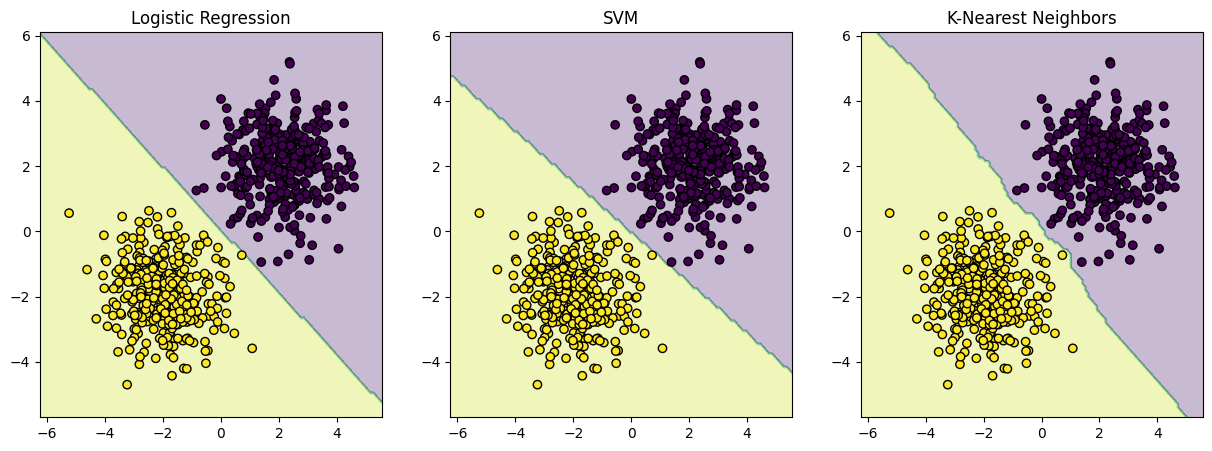

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    ax = axes[i]
    buildingClassification(X_train, y_train, model, ax)
    ax.set_title(name)
plt.show()

**Аналіз отриманих результатів**:

1.  Логістична регресія та SVM нормально підходить для лінільно роздільних наборів даних, їхні гіперплощини чітко розмежовують класи.
2.  Продуктивність KNN низька на складніших наб. даних із нелінійними межами , але процюе добре на лінійних даних.
3.  Три моделі показують високу точність на лінійно роздільних даних.

**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [7]:
data = pd.read_csv('syntheticThreeClassData.csv')
X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"Logistic Regression Сorrectness: {acc_logreg:.3f}")
print(f"SVM Сorrectness: {acc_svm:.3f}")
print(f"KNN Сorrectness: {acc_knn:.3f}")

Logistic Regression Сorrectness: 0.893
SVM Сorrectness: 0.896
KNN Сorrectness: 0.870


e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


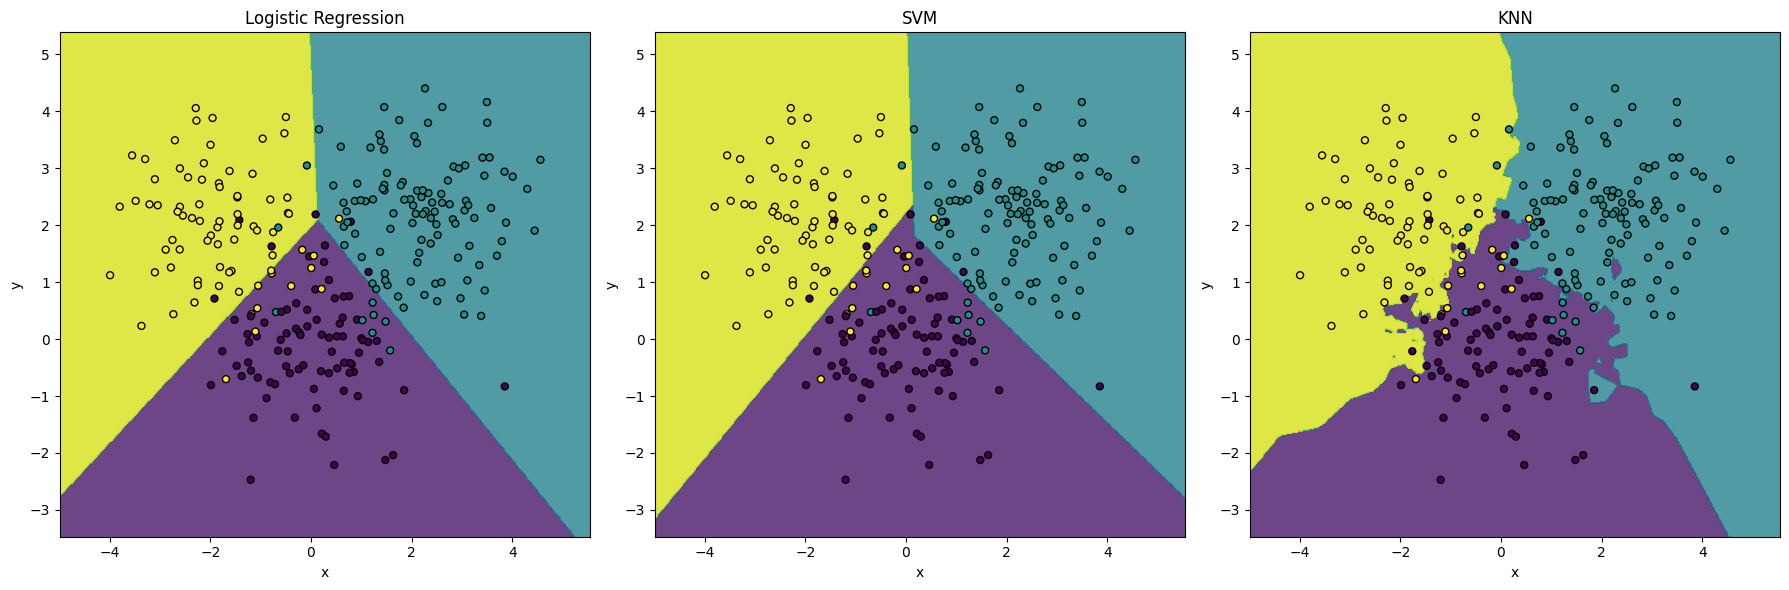

In [10]:
def plotDecisionBoundary(model, X, y, ax, title):
    h = .02
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X['x'], X['y'], c=y, edgecolors='k', marker='o', s=25)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plotDecisionBoundary(logreg, X_test, y_test, axs[0], 'Logistic Regression')
plotDecisionBoundary(svm, X_test, y_test, axs[1], 'SVM')
plotDecisionBoundary(knn, X_test, y_test, axs[2], 'KNN')

plt.tight_layout()
plt.show()

In [11]:
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_logreg))

print("\nSVM Report:\n")
print(classification_report(y_test, y_pred_svm))

print("\nKNN Report:\n")
print(classification_report(y_test, y_pred_knn))

Logistic Regression Report:

              precision    recall  f1-score   support

         1.0       0.80      0.92      0.85        83
         2.0       0.96      0.92      0.94       111
         3.0       0.91      0.83      0.87        76

    accuracy                           0.89       270
   macro avg       0.89      0.89      0.89       270
weighted avg       0.90      0.89      0.89       270


SVM Report:

              precision    recall  f1-score   support

         1.0       0.80      0.93      0.86        83
         2.0       0.96      0.92      0.94       111
         3.0       0.93      0.83      0.88        76

    accuracy                           0.90       270
   macro avg       0.90      0.89      0.89       270
weighted avg       0.90      0.90      0.90       270


KNN Report:

              precision    recall  f1-score   support

         1.0       0.78      0.87      0.82        83
         2.0       0.93      0.90      0.91       111
         3.0      

**Аналіз отриманих результатів**:

1.   точність моделей залежить від того наскільки класи перекриті
2.   Логістична регресія та SVM показали однакові результати, бо дані добре піддаються лінійній класифікації.
3.   KNN показує поганий результат через чутливість до шуму та кількості сусідів.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [12]:
data = pd.read_csv('tor_in_tor_data.csv')
X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Сorrectness:", acc_logreg)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Сorrectness: 0.47333333333333333
Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.47      0.45      0.46       150
         1.0       0.47      0.50      0.49       150

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300



In [14]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Сorrectness:", acc_svm)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

SVM Сorrectness: 0.9933333333333333
SVM Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       150
         1.0       0.99      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Сorrectness:", acc_knn)
print("KNN Report:\n", classification_report(y_test, y_pred_knn))

KNN Сorrectness: 0.9933333333333333
KNN Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       150
         1.0       0.99      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


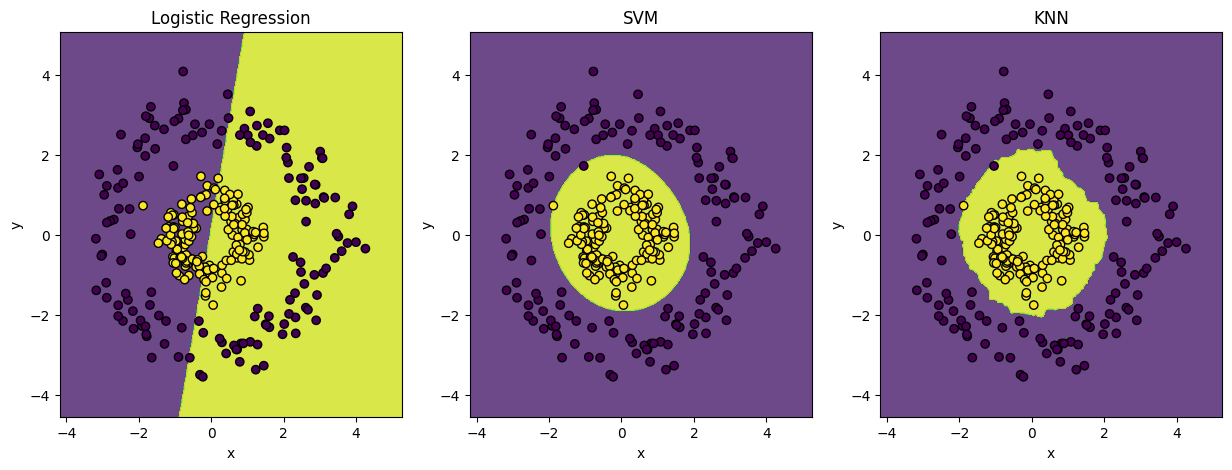

In [17]:
def plotDecisionBoundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X['x'], X['y'], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plotDecisionBoundary(logreg, X_test, y_test, "Logistic Regression")

plt.subplot(1, 3, 2)
plotDecisionBoundary(svm, X_test, y_test, "SVM")

plt.subplot(1, 3, 3)
plotDecisionBoundary(knn, X_test, y_test, "KNN")

**Аналіз отриманих результатів**:

1.   Точність логістичної регресії погана тому , що погано справляється з нелінійними даними.
2.   SVM з нелінійним ядром (rbf) показує високу точність
3.   KNN показує середній результат через чуьливість до меж між класами.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [18]:
data = pd.read_csv('spiralData.csv')
X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Сorrectness:", acc_logreg)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Сorrectness: 0.58
Logistic Regression Report:
               precision    recall  f1-score   support

         0.0       0.59      0.51      0.55       150
         1.0       0.57      0.65      0.61       150

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.58      0.58       300



In [20]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Сorrectness:", acc_svm)
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

SVM Сorrectness: 0.79
SVM Report:
               precision    recall  f1-score   support

         0.0       0.80      0.77      0.79       150
         1.0       0.78      0.81      0.79       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Сorrectness:", acc_knn)
print("KNN Report:\n", classification_report(y_test, y_pred_knn))

KNN Сorrectness: 1.0
KNN Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       150
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


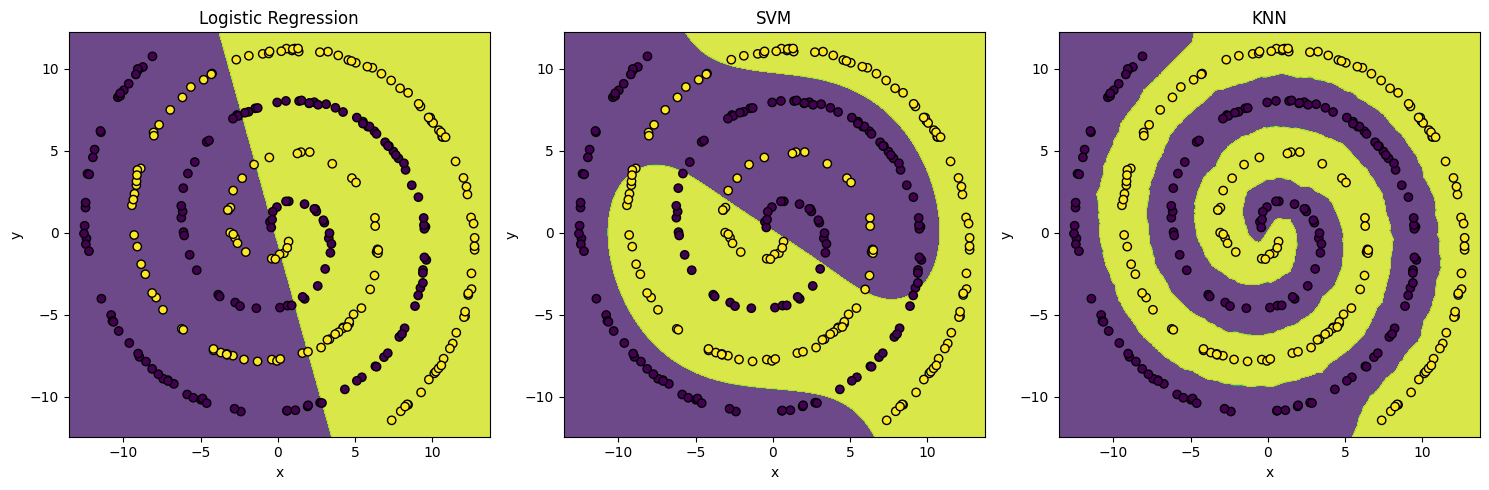

In [24]:
def plotDecisionBoundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X['x'].min() - 1, X['x'].max() + 1
    y_min, y_max = X['y'].min() - 1, X['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X['x'], X['y'], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plotDecisionBoundary(logreg, X_test, y_test, "Logistic Regression")

plt.subplot(1, 3, 2)
plotDecisionBoundary(svm, X_test, y_test, "SVM")

plt.subplot(1, 3, 3)
plotDecisionBoundary(knn, X_test, y_test, "KNN")

plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

1.   Дані є нелінійними і тому Логістична регресія погвно справляється з даними.
2.   SVM показує кращі результати для нелінійних даних.
3.   KNN з цим набором даних показує хороші результати, але чутливий до кількості сусідів та шуму.